<a href="https://colab.research.google.com/github/AKINYEMI01/Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Import libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Load Dataset

In [2]:
filename = '/content/drive/MyDrive/diabetic_data.csv'
df = pd.read_csv(filename)

In [3]:
df.shape

(101766, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.head(50)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Explanatory Data Analysis


In [6]:
# Check the descriptive statictis
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
# Check for missing values
df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [8]:
# Drop the unnecessary columns
df.drop(['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty','encounter_id','patient_nbr'], axis=1, inplace=True)

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
df['race'] = df['race'].apply(lambda x: 'Other' if x == '?' else x)

In [11]:
# Replace ? with nan
df = df.replace({'?': np.nan})

In [12]:
df.isna().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [13]:
# Drop missing values
df = df.dropna()

In [14]:
# Remove rows where gender is 'Unknown/Invalid'
df = df[df['gender'] != 'Unknown/Invalid']

# Verify the change by checking the value counts of the 'gender' column
display(df['gender'].value_counts())

,count
gender,
Female,53922
Male,46319


In [15]:
# Check the class distribution
df['readmitted'].value_counts()

,count
readmitted,
NO,53818
>30,35173
<30,11250


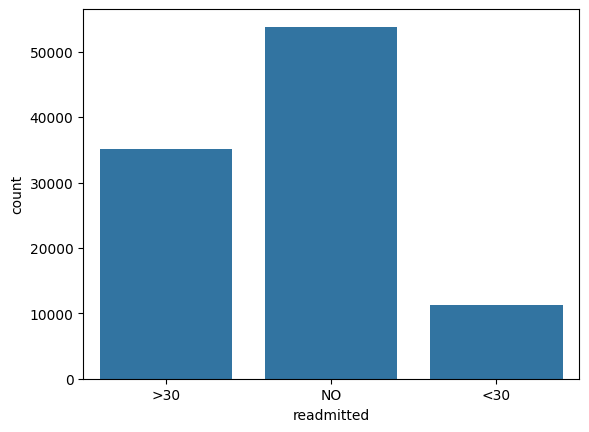

In [16]:
# Visualize the distribution of readmiited
sns.countplot(x='readmitted', data=df)
plt.show()

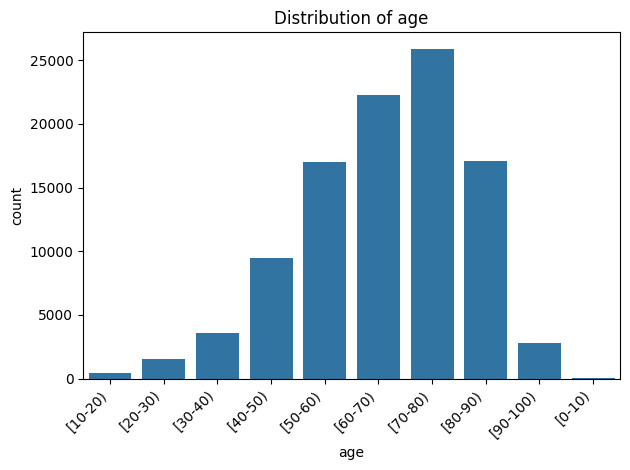

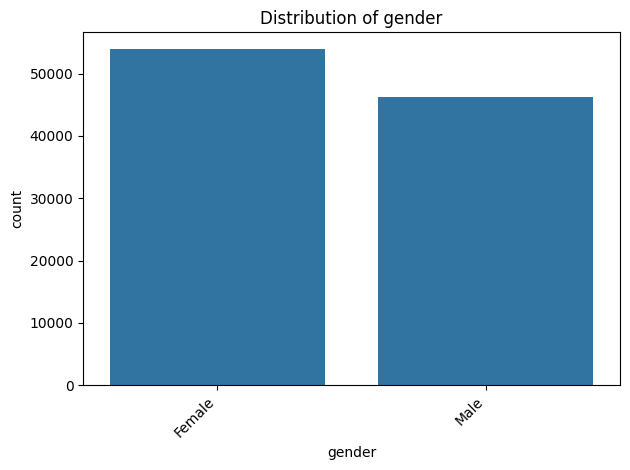

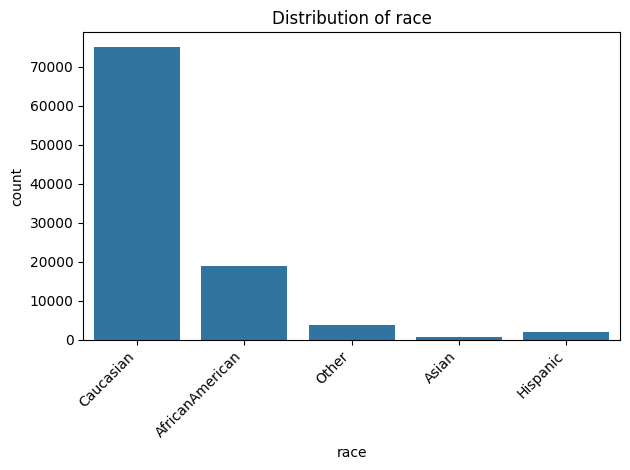

In [17]:
# Visualize the distribution of specified categorical columns
columns = ['age', 'gender', 'race']
for col in columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [18]:
# Categorize into binary target and drop the readmitted due to data leakage
df['readmited_binary'] = df['readmitted'].apply(lambda x: 1 if x != 'NO' else 0)

# ***Explicitly drop the original 'readmitted' column***
df = df.drop('readmitted', axis=1)

Text(0, 0.5, 'Count')

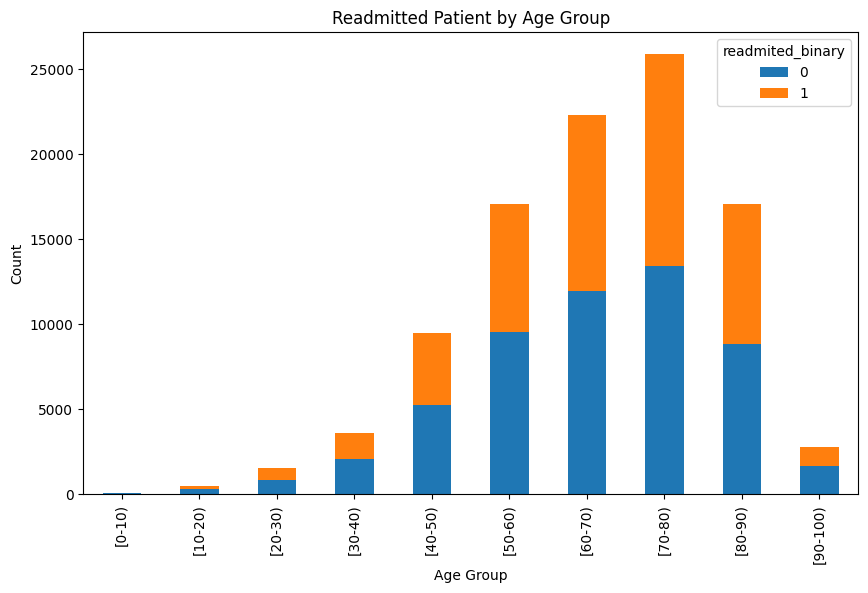

In [19]:
# stacked Bar plot showing the readmitted patient with age
age_readmitted = df.groupby(['age', 'readmited_binary']).size().unstack()
age_readmitted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Readmitted Patient by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

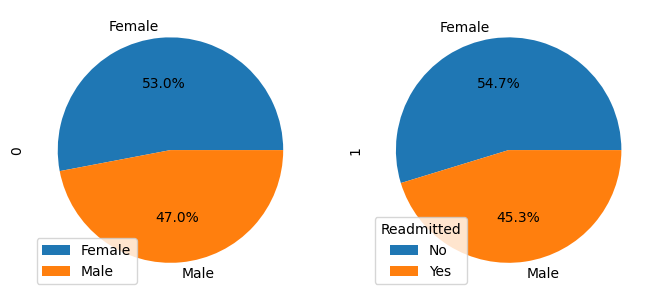

In [20]:
# Pie chart showing the readmitted patient against gender, show the %
gender_readmitted = df.groupby(['gender', 'readmited_binary']).size().unstack()
gender_readmitted.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8, 5))
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.show()

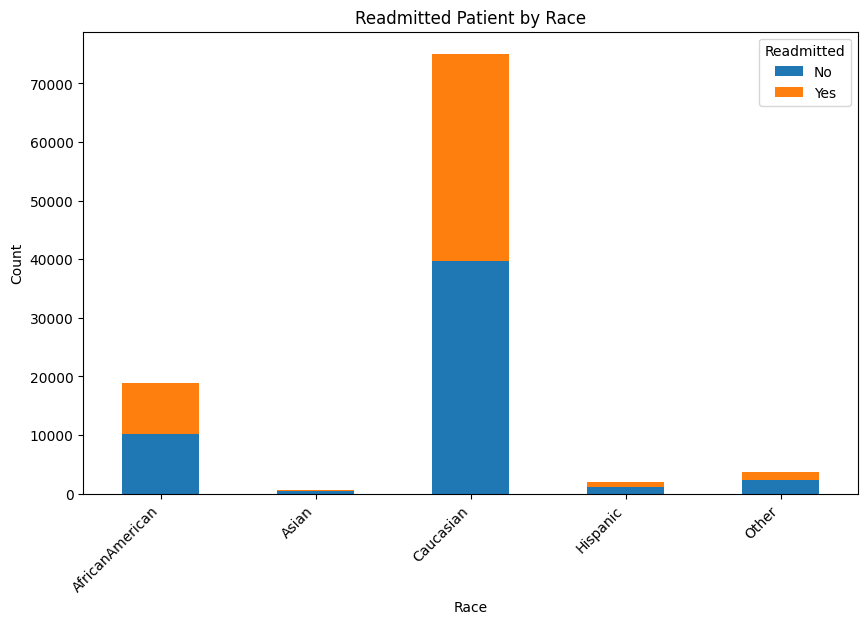

In [21]:
# Barchart showing the readmitted patient against race
race_readmitted = df.groupby(['race', 'readmited_binary']).size().unstack()
race_readmitted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Readmitted Patient by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Readmitted', labels=['No', 'Yes'])

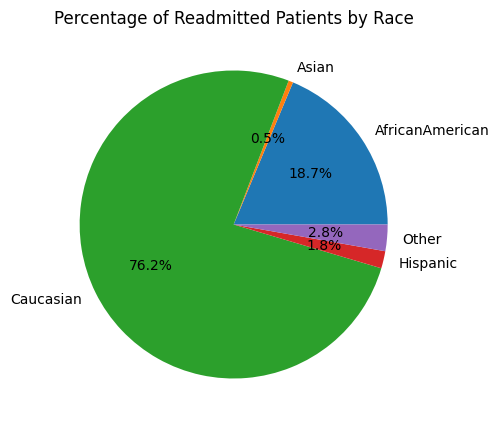

In [22]:
# Plot the pie chart of just the readmitted patient 1 against race
readmitted_df = df[df['readmited_binary'] == 1]
race_readmitted = readmitted_df.groupby('race').size()
race_readmitted.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 5))
plt.title('Percentage of Readmitted Patients by Race')
plt.ylabel('')
plt.show()


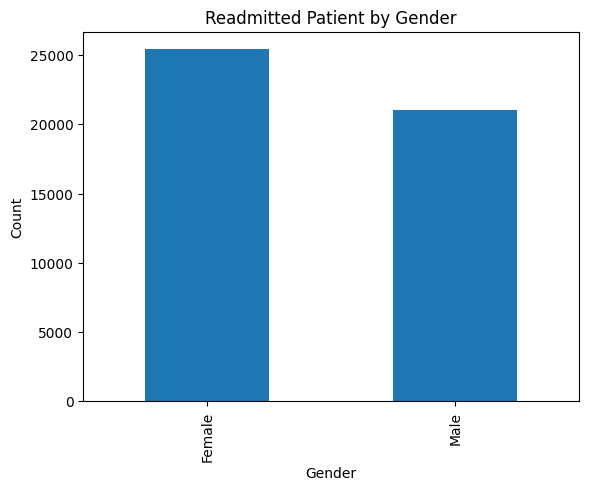

In [23]:
# Plot the bar chart of just the readmitted patient 1 against gender
readmitted_df = df[df['readmited_binary'] == 1]
gender_readmitted = readmitted_df.groupby('gender').size()
gender_readmitted.plot(kind='bar')
plt.title('Readmitted Patient by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [24]:
# Encode all categorical data
# Select categorical columns (excluding the binary target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'readmited_binary' in categorical_cols:
    categorical_cols.remove('readmited_binary')

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('readmited_binary', axis=1)
y = df_encoded['readmited_binary']

# Normalize data

In [25]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler and transform the data
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled

array([[-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
         0.92739927,  0.54703706],
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       ...,
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       [-0.01575531, -0.1380775 ,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
         0.92739927, -1.82802972]])

# DATASET SPLITTING

In [27]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80192, 2319)
Testing set shape: (20049, 2319)


In [28]:


# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Make prediction on the test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

# Model Evaluation

In [30]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.6302
Precision: 0.6387
Recall: 0.4477
F1-Score: 0.5264

Confusion Matrix:


array([[8514, 2331],
       [5083, 4121]])

In [31]:
# Calculate the correlation of each feature with the target variable
correlation_with_target = X_train.corrwith(y_train).sort_values(ascending=False)

# Display the correlations
print("Correlation of features with the target variable:")
display(correlation_with_target)

Correlation of features with the target variable:


,0
number_inpatient,0.215622
number_diagnoses,0.107169
number_emergency,0.103248
number_outpatient,0.081051
diag_1_428,0.067653
...,...
diag_3_E886,NaN
diag_3_E894,NaN
diag_3_E945,NaN
acetohexamide_Steady,NaN


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

In [33]:
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")
print("\nDecision Tree Confusion Matrix:")
display(conf_matrix_dt)

Decision Tree Accuracy: 0.5764
Decision Tree Precision: 0.5387
Decision Tree Recall: 0.5390
Decision Tree F1-Score: 0.5388

Decision Tree Confusion Matrix:


array([[6596, 4249],
       [4243, 4961]])

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [35]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
display(conf_matrix_rf)

Random Forest Accuracy: 0.6375
Random Forest Precision: 0.6294
Random Forest Recall: 0.5120
Random Forest F1-Score: 0.5646

Random Forest Confusion Matrix:


array([[8070, 2775],
       [4492, 4712]])

# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)